## Schwingungen

In [1]:
# Am Anfang müssen wir ein paar Bibliotheken laden, um alle Funktionen, die wir verwenden möchten, parat zu haben.
from math import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

In diesem Notebook geht es um ungedämpfte, gedämpfte, und erzwungene Schwingungen.

Zunächst betrachten wir eine reine, ungedämpfte Sinusschwingung der Frequenz $f=1$Hz (d.h. $\omega=2\pi f = 6.28$Hz).

Mit dieser Frequenz schwingt z.B. eine Feder mit der Federkonstante 
$$k_F = 39,5 \frac{N}{m}$$
an der eine Masse
$$m=1 kg$$
hängt.

Außerdem berücksichtigen wir auch noch den Anfangszustand der Feder zur Zeit t=0.  Diesen Zustand beschreiben wir duch den Winkel $ \phi_0$.
Die Amplitude der Schwingung ist gegeben durch die maximale Auslenkung der Feder $x_m$.

Die Auslenkung der Feder kann somit komplett beschrieben werden durch:
$$x(t) = x_m \cdot \cos(\omega t + \phi_0)$$

Frequenz = 1.00027330689 Hz und Kreisfrequenz = 6.28490254499 Hz


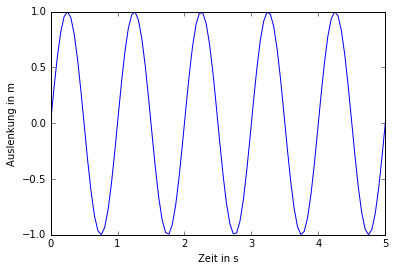

In [2]:
kf        = 39.5           # Federkonstante
m         = 1.0            # Masse
omega     = sqrt(kf/m)     # Kreisfrequenz in Hz
f         = omega/(2*pi)   # Frequenz in Hz
phi0      = -pi/2          # Anfangswinkel
x_m       = 1.0            # Schwingungsamüplitude in m

t = linspace(0,5,100)
x = x_m*cos(omega*t+phi0)
plot(t,x)
xlabel('Zeit in s')
ylabel('Auslenkung in m')
print("Frequenz =",f,"Hz und Kreisfrequenz =",omega,"Hz")

Das gleiche Ergebnis erhalten wir, wenn wir uns den Realteil einer komplexen Funktion darstellen lassen:
$$x(t) =  \Re \left[ x_m\cdot e^{i(\omega t + \phi_0)} \right] = x_m\cdot cos(\omega t + \phi_0)$$

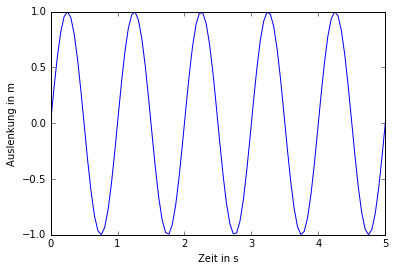

In [3]:
xComplex = x_m*exp(1j*(omega*t+phi0))
plot(t,real(xComplex))
xlabel('Zeit in s')
ylabel('Auslenkung in m')

Nun probieren wir aus, was passiert, wenn wir die Schwingung dämpfen, d.h. eine zusätzliche Widerstandskraft dazunehmen, die proportional zur geschwindigkeit ist (z.B. Bewegung in einem viskosen Medium)
$$F_W = -b v = -b \dot{x}$$
Die Bewegungsgleichung muss nun folgende Differentialgleichung zweiter Ordnung lösen
$$m \ddot{x} + b \dot{x} + k_F x = 0$$
oder leicht umgeformt:
$$\ddot{x} + \frac{b}{m} \dot{x} + \frac{k_F}{m} x = 0$$


Der allgemeine Ansatz zum Lösen dieser allgemeineren Bewegungsgleichung ist gegeben durch 
$$x(t)=x_m e^{\lambda}$$
wobei der Exponent gegeben ist durch
$$\lambda = -\frac{b}{2 m} \pm \sqrt{\left( \frac{b}{2 m}\right)^2-\omega_0^2}\\
= -\gamma \pm i \omega'$$
wobei $\gamma =-\frac{b}{2 m} $ und $\omega' = \sqrt{\omega_0^2 - \left( \frac{b}{2 m}\right)^2}$.

Dies bedeutet, dass wir zwei unterschiedliche Lösungen unserer Differentialgleichung haben. Die allgemeine Lösung ist also 
$$x(t)=x_{m,1} e^{-\gamma t} e^{i \omega' t} + x_{m,2} e^{-\gamma t} e^{-i \omega' t}$$

In all unseren Experimenten lassen wir das Pendel aus der Ruhelage bei maximaler Auslenkung los, d.h. 
$$x(t=0) = x_{m,1}  e^{-\gamma t} e^{i \omega' t} + x_{m,2} e^{-\gamma t} e^{-i \omega' t} = x_m \\
\Rightarrow x_{m,1} + x_{m,2} = x_m $$

Außerdem ist die Geschwindigkeit am Anfang Null, d.h.:
$$\dot{x}(t=0) = x_{m,1} \left( -\gamma +i \omega'\right) e^{-\gamma t} e^{i \omega' t} + \left(x_m - x_{m,1}\right)\left( -\gamma -i \omega'\right) e^{-\gamma t} e^{-i \omega' t} = 0 \\
\Rightarrow x_{m,1} \left( -\gamma +i \omega'\right) + \left(x_m - x_{m,1}\right)\left( -\gamma -i \omega'\right) = 0 \\
\Rightarrow x_m \left( -\gamma -i \omega'\right) + x_{m,1} 2 i \omega' = 0 \\
\Rightarrow x_{m,1} = \frac{1}{2} x_m  \frac{\gamma + i \omega'}{i \omega'} 
= \frac{1}{2} x_m  \left( 1 - i\frac{\gamma}{\omega'} \right) \\
\Rightarrow \Re \left[x_{m,1} \right] = \frac{1}{2} \Re \left[x_{m} \right]  \textrm{and} \\
\Im \left[x_{m,1} \right] =  \Im \left[x_m \right]  = 0 $$

Dies bedeutet, dass wenn wir die Zeit immer ab dem Punkt messen, an dem die Auslenkung maximal ist, ist $x_m$ reell, und somit die Phase  
$$\phi_0 = 0$$

Die Schwingungsgleichung in diesem Fall lautet dann 
$$x(t) = \frac{1}{2} x_m  e^{-\gamma t} e^{i \omega' t} + \frac{1}{2} x_m e^{-\gamma t} e^{-i \omega' t} \\
= \frac{1}{2} x_m  e^{-\gamma t} \left(e^{i \omega' t} + e^{-i \omega' t} \right)
= \frac{1}{2} x_m  e^{-\gamma t} 2 \cos\left(\omega' t\right) \\
\Rightarrow x(t) =  x_m  e^{-\gamma t} \cos\left(\omega' t\right)$$


lambda =  (-1+6.204836823j)


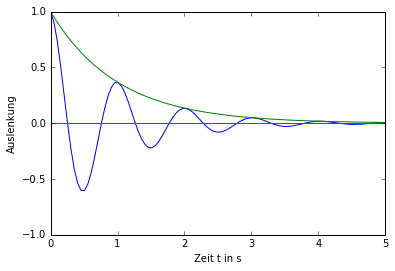

In [4]:
b     = 2         # Dämpfungskoeffizient
lamb = -b/(2*m) + sqrt(complex((b/(2*m))**2-omega**2,0))

xDamp = x_m*exp(lamb*t)
envelope = x_m*exp(real(lamb)*t)
plot(t,real(xDamp))
plot(t,real(envelope))
plot(t,0*t)
ylim(-1,1)
xlabel('Zeit t in s')
ylabel('Auslenkung')
print("lambda = ",lamb)

Die obige Schwingung ist schwach gedämpft, d.h. die es sind immernoch Oszillationen zu beobachten, und $\lambda$ ist komplex.  
Der Realteil des komplexen Exponenten $\Re[\lambda] = -b/2m$ definiert die Einhüllende, d.h. die Funktion, die den Abfall der Schwingungsamplitude 
beschreibt.

Im folgenden betrachten wir, was passiert, wenn die Dämpfung deutlich größer wird.  Dann haben wir zwei weitere Möglichkeiten:

1.  aperiodischer Grenzfall: $\lambda$ ist geradeso reell, d.h. die Wurzel wird genau 0

2.  überdämpfte Schwingung:  in $\lambda$ ist der Ausdruck unter der Wurzel größer als 0

### Aperiodischer Grenzfall

Im aperiodischen Grenzfall können wir auch einen weiteren Ansatz testen, nämlich
$$x(t) = te^{\lambda t}$$
Wenn wir uns die Differentialgleichung für den Spezialfall, dass $\omega_0 = \frac{b}{2m}$ ansehen, dann erhalten wir
$$\ddot{x}+ 2\omega_0 \dot{x} + \omega_0^2 x = 0$$
$$ \Rightarrow \left(\lambda e^{\lambda t} + \lambda e^{\lambda t} + t\lambda^2 e^{\lambda t}\right)+ 
2\omega_0 \left(e^{\lambda t} + t\lambda e^{\lambda t}\right) + 
\omega_0^2 te^{\lambda t} = 0$$
$$ \Rightarrow \left(t\left[\lambda^2 +2\omega_0\lambda+\omega_0^2\right] + 2\lambda +  2\omega_0 \right) e^{\lambda t} = 0$$
Mit dem Wissen, dass $\lambda = -\omega_0$ erhalten wir:
$$ \Rightarrow \left(\lambda^2 +2\omega_0\lambda+\omega_0^2 \right)te^{\lambda t} = 0$$
Diese muss für alle t gelten, und somit folgt die selbe **characteristische Gleichung** wie für den Ansatz $x(t) = e^{\lambda t}$:
$$ \lambda^2 +2\omega_0\lambda+\omega_0^2 = 0$$
mit der Lösung $\lambda = -\omega_0$

Dies bedeutet, dass beide Ansätze korrekt sind, und die allgemeine Lösung für die Schwingungsgleichung im aperiodischen Grenzfall muss also lauten:
$$x(t) = x_{m,1} e^{-\gamma t} + x_{m,2} t e^{-\gamma t}$$
$$ \gamma = \frac{b}{2m} = \omega_0 = \sqrt{\frac{k}{m}}=-\lambda$$

Das Verhältnis aus den beiden Amplituden $x_{m,1}$ und $x_{m,2}$ ergibt sich aus Randbedingungen, die wir zusätzlich stellen können. Wir können, z.B. festlegen, dass die Auslenkung am Anfang maximal sei, und die Geschwindigkeit Null, d.h.
$$\dot{x}(t=0) = -\gamma x_{m,1} e^{-\gamma t} + x_{m,2} e^{-\gamma t} -\gamma x_{m,2} t 
e^{-\gamma t} = 0 $$
$$\Rightarrow -\gamma x_{m,1}  + x_{m,2}  = 0 $$
$$\Rightarrow x_{m,2}  = \gamma x_{m,1} $$
und damit (für $\dot{x}(t=0) = 0$)
$$x(t) = x_m \left(1+\gamma t\right) e^{-\gamma t}$$


 


Daempfungskoeffizient fuer aperiodischen Grenzfall: b= 12.56980509
lambda =  (-6.28490254499+0j)


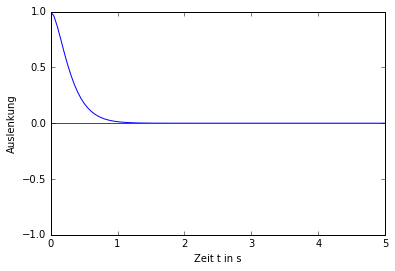

In [5]:
b    = omega*2*m         # Dämpfungskoeffizient im aperiodischen Grenzfall
lamb = -b/(2*m) + sqrt(complex((b/(2*m))**2-omega**2,0))

print("Daempfungskoeffizient fuer aperiodischen Grenzfall: b=",b)
xDamp = x_m*(1-lamb*t)*exp(lamb*t)
plot(t,real(xDamp))
plot(t,0*t)
ylim(-1,1)
xlabel('Zeit t in s')
ylabel('Auslenkung')
print("lambda = ",lamb)

Der obige Graph stellt den aperiodischen Grenzfall dar.  Hier schwingt die Masse nicht mehr durch den Nullpunkt durch, sondern erreicht diesen
nur asymptotisch von einer Seite her.

### Überdämpfte Schwingung, Kriechfall

Im folgenden betrachten wir eine überdämpfte Schwingung (Kriechfall), d.h. die Dämpfungskonstante $b$ ist größer, als im aperiodischen Grenzfall. Wir haben dieses mal wieder (d.h. wie im schwach gedämpften Fall) nur eine Form der Lösung für unsere Schwingungsgleichung, aber mit zwei verschiedenen Dämpfungskonstanten:
$$\lambda_{1,2} = -\frac{b}{2 m} \pm \sqrt{\left( \frac{b}{2 m}\right)^2-\omega_0^2} $$
Um diesen Ausdruck etwas zu vereinfachen, definieren wir 
$$\gamma_1 = \frac{b}{2 m} + \sqrt{\left( \frac{b}{2 m}\right)^2-\omega_0^2}$$
$$\gamma_2 =  \frac{b}{2 m} - \sqrt{\left( \frac{b}{2 m}\right)^2-\omega_0^2} $$
Die allgemeine Lösung ist also 
$$ x(t) = x_{m,1} e^{-\gamma_1 t} + x_{m,2} e^{-\gamma_2 t}$$

Wir können wieder festlegen, dass die Amplitude der Bewegung am Beginn gleich $x_m$ sein soll, und die Geschwindigkeit $\dot{x}(t=0) = 0$. 
$$ \dot{x}(t=0) = -\gamma_1 x_{m,1} e^{-\gamma_1 t}  -\gamma_2 x_{m,2} e^{-\gamma_2 t} \\
= -\gamma_1 x_{m,1} -\gamma_2 x_{m,2} = 0$$
$$\Rightarrow x_{m,2} = -x_{m,1} \frac{\gamma_1}{\gamma_2}$$

Die Amplitude bei $t=0$ sollte gerade $x_m$ entsprechen, wir müssen also weiterhin festlegen, dass 
$$ x(t=0) =  x_{m,1} e^{-\gamma_1 t}  -x_{m,1} \frac{\gamma_1}{\gamma_2} e^{-\gamma_2 t} = 0$$
$$ \Rightarrow x_{m,1}\left(1-\frac{\gamma_1}{\gamma_2} \right) = x_{m,1} \frac{\gamma_2 - \gamma_1}{\gamma_2} = x_m $$
$$ \Rightarrow x_{m,1} = \frac{\gamma_2}{\gamma_2 - \gamma_1} x_m  $$
$$ \Rightarrow x_{m,2} = -\frac{\gamma_1}{\gamma_2} \frac{\gamma_2}{\gamma_2 - \gamma_1} x_m = \frac{\gamma_1}{\gamma_1 - \gamma_2}  x_m  $$


Somit ist die Lösung der Schwingungsgleichung für  $\dot{x}(t=0) = 0$ im Kriechfall:
$$x(t) = x_m \left(\frac{\gamma_2}{\gamma_2-\gamma_1} e^{-\gamma_1 t} + \frac{\gamma_1}{\gamma_1-\gamma_2} e^{-\gamma_2 t}\right)$$


Daempfungskoeffizient fuer aperiodischen Grenzfall: b= 30
gamma1 =  28.6198384719 , gamma2 =  1.38016152812


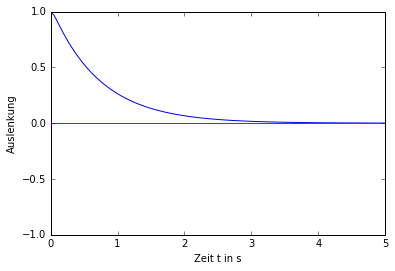

In [6]:
b     = 30         # Dämpfungskoeffizient
gamma1 = b/(2*m) + sqrt((b/(2*m))**2-omega**2)
gamma2 = b/(2*m) - sqrt((b/(2*m))**2-omega**2)

print("Daempfungskoeffizient fuer aperiodischen Grenzfall: b=",b)
print("gamma1 = ",gamma1,", gamma2 = ",gamma2)
xDamp = x_m*(gamma2/(gamma2-gamma1)*exp(-gamma1*t) + gamma1/(gamma1-gamma2)*exp(-gamma2*t))
plot(t,real(xDamp))
plot(t,0*t)        # Zeichne eine x-Achse
ylim(-1,1)
xlabel('Zeit t in s')
ylabel('Auslenkung')


Wen aber die Anfangsgeschwindigkeit nicht Null ist, sondern einen endlichen Wert hat, dann kann die Kurve auch sehr anders aussehen.

$$ \dot{x}(t=0) = -\gamma_1 x_{m,1} e^{-\gamma_1 t}  -\gamma_2 x_{m,2} e^{-\gamma_2 t}= -\gamma_1 x_{m,1} -\gamma_2 x_{m,2} = v_0$$
$$\Rightarrow x_{m,2} = -\frac{x_{m,1} \gamma_1 + v_0}{\gamma_2}$$

Gleichzeitig soll für $t=0$ die Auslenkung maximal sein, d.h. $x(t=0) = x_m$
$$ \Rightarrow x_{m,1} + x_{m,2} = x_{m,1} \left(1 -\frac{ \gamma_1 + \frac{v_0}{x_{m,1}}}{\gamma_2} \right) = x_m \\
\Rightarrow x_{m,1} = x_m\frac{ \gamma_2}{\gamma_2 -\gamma_1 - \frac{v_0}{x_{m,1}} } 
\Rightarrow  x_{m,1} \left( \gamma_2 -\gamma_1 \right) -v_0 = x_m \gamma_2 \Rightarrow 
x_{m,1}  =  \frac{x_m \gamma_2+v_0}{\gamma_2 -\gamma_1} $$

Daempfungskoeffizient fuer aperiodischen Grenzfall: b= 30
gamma1 =  28.6198384719 , gamma2 =  1.38016152812
x_m1 =  1.23422309821 , x_m2 =  -0.234223098214


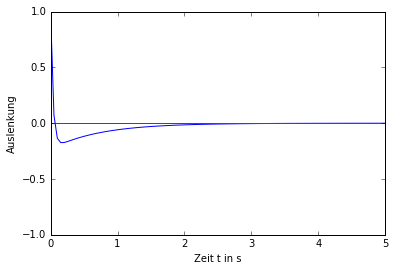

In [7]:
b     = 30         # Dämpfungskoeffizient
gamma1 = b/(2*m) + sqrt((b/(2*m))**2-omega**2)
gamma2 = b/(2*m) - sqrt((b/(2*m))**2-omega**2)
v0 = -35
xm = 1

xm1 = (xm*gamma2 + v0)/(gamma2-gamma1)
xm2 = -(xm1*gamma1+v0)/gamma2

print("Daempfungskoeffizient fuer aperiodischen Grenzfall: b=",b)
print("gamma1 = ",gamma1,", gamma2 = ",gamma2)
print("x_m1 = ",xm1,", x_m2 = ",xm2)

xDamp = xm1*exp(-gamma1*t) + xm2*exp(-gamma2*t)
plot(t,real(xDamp))
plot(t,0*t)        # Zeichne eine x-Achse
ylim(-1,1)
xlabel('Zeit t in s')
ylabel('Auslenkung')

Wie Sie sehen, lässt es sich mit der entsprechenden Anfangsgeschwindigkeit auch realisieren, dass das Pendel zunächst durchschwingt, bevor es dann kriecht.

### Erzwungene Schwingung

Nun haben wir die freie Schwingung ausreichend betrachtet und können uns der erzwungenen Schwingung widmen.

Die Bewegungsgleichung muss nun folgende **inhomogene Differentialgleichung zweiter Ordnung** lösen
$$m \ddot{x} + b \dot{x} + k_F x = F_{ext} \cos (\omega t)$$

Diese Differentialgleichung lässt sich einfach numerisch lösen, wenn die Anfangsbedingungen wohl definiert sind.  
Dazu berechnet man die Kräfte und die daraus folgenden Beschleunigungen und integriert diese einfach auf. 

Resonanzfrequenz des Systems: f = omega/2pi =  1.00027330689 Hz


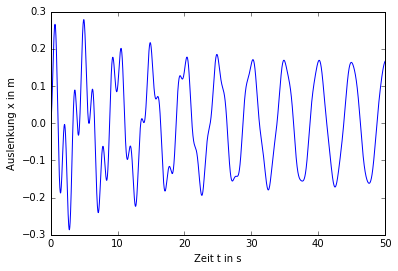

In [8]:
Fext   = 30.0        # Externe Kraft
dt     = 1.0e-3      # Zeitschritt in s
tmax   = 50          # Gesamtzeit der Simulation
b      = 0.3         # Dämpfung 
omega0 = sqrt(kf/m)  # Eigenfrequenz der freien Schwingung in Hz
omega  = 2*pi*0.2    # Frequenz der externen Anregung in Hz

# Jetzt legen wir Arrays für die Zeit und die Pendelposition an:
x = []
x.append(0.0)
xdot  = 0.0
xddot = 0.0
FextNorm = Fext*omega/omega0
for t in arange(0,tmax,dt):
    x.append((x[-1]+xdot*dt+0.5*dt*dt*xddot))
    F     = FextNorm*cos(omega*t) 
    xdot  = (x[-1]-x[-2])/dt
    xddot = (F-kf*x[-1]-b*xdot)/m
plot(arange(0,tmax+1*dt,dt),x)
xlabel('Zeit t in s')
ylabel('Auslenkung x in m')
print("Resonanzfrequenz des Systems: f = omega/2pi = ",(omega0/(2*pi)),"Hz")

Wir können auch die erwartete Amplitude darstellen.  Das analytische Ergebnis ist:
$$x_m = \frac{F_{ext}}{\sqrt{m^2\left(\omega_0^2-\omega^2\right)^2+b^2 \omega^2}}$$

Auch für die Phasenverschiebung haben wir ein analytisches Ergebnis:
$$\tan(\phi) = \frac{b \omega}{m\left(\omega_0^2-\omega^2\right)}$$

w0 =  6.28490254499 Hz, Masse =  1.0 kg


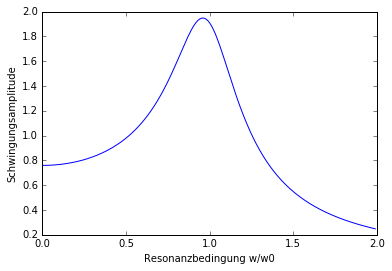

In [9]:
Fext = 30
b = 2.5

omegaArray = arange(0*omega0,2.0*omega0,0.01*omega0)
xm    = Fext/sqrt(m**2*(omega0**2-omegaArray**2)**2+b**2*omegaArray**2)
plot(omegaArray/omega0,xm)
xlabel('Resonanzbedingung w/w0')
ylabel('Schwingungsamplitude')
print("w0 = ",omega0,"Hz, Masse = ",m,"kg")

Die Phasenverschiebung zwischen anregender Oszillation und der Bewegung des Pendels ist nach obiger Gleichung: 

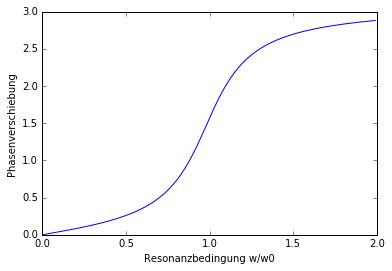

In [10]:
phi = arctan2(b*omegaArray,(m*(omega0**2-omegaArray**2)))
plot(omegaArray/omega0,phi)
xlabel('Resonanzbedingung w/w0')
ylabel('Phasenverschiebung')

Dieser Plot bedeutet, dass das Pendel für Anregungsfrequenzen unterhalb der Resonanzfrequenz in Phase mit der Anregung schwingt, darüber aber gegenläufig (Phasenverschiebung = 180°).